In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from math import log2


# Load and Clean Data
df = pd.read_csv("sleep_health.csv").dropna()

df_2015 = pd.DataFrame({
    "Poor_Sleep": df["2015NRS"],
    "Gender": df["gender"],
    "Age": df["2015Age"],
    "BMI": df["2015BMI"],
    "Smoking": df["2015Smoking"],
    "Exercise": df["2015EX"],
    "Diabetes": df["2015Diabetes"],
    "Drinking_Habit": df["2015DrinkHabit"],
    "Hypertension": df["2015Hypertension"]
})

# Bin Age and BMI
df_2015["Age"] = pd.cut(df_2015["Age"], bins=[39, 49, 59, 69, 74], labels=["40–49", "50–59", "60–69", "70–74"])
df_2015["BMI"] = pd.cut(df_2015["BMI"], bins=[0, 18.5, 25, float("inf")], labels=["Underweight", "Normal", "Overweight"])

# Encode all features
le = LabelEncoder()
for col in df_2015.columns:
    df_2015[col] = le.fit_transform(df_2015[col])

# Train
target = "Poor_Sleep"
features = [col for col in df_2015.columns if col != target]
X = df_2015[features]
y = df_2015[target]

In [12]:
unbalanced_forest = RandomForestClassifier(criterion="entropy", random_state=42)
unbalanced_forest.fit(X, y)

RandomForestClassifier(criterion='entropy', random_state=42)

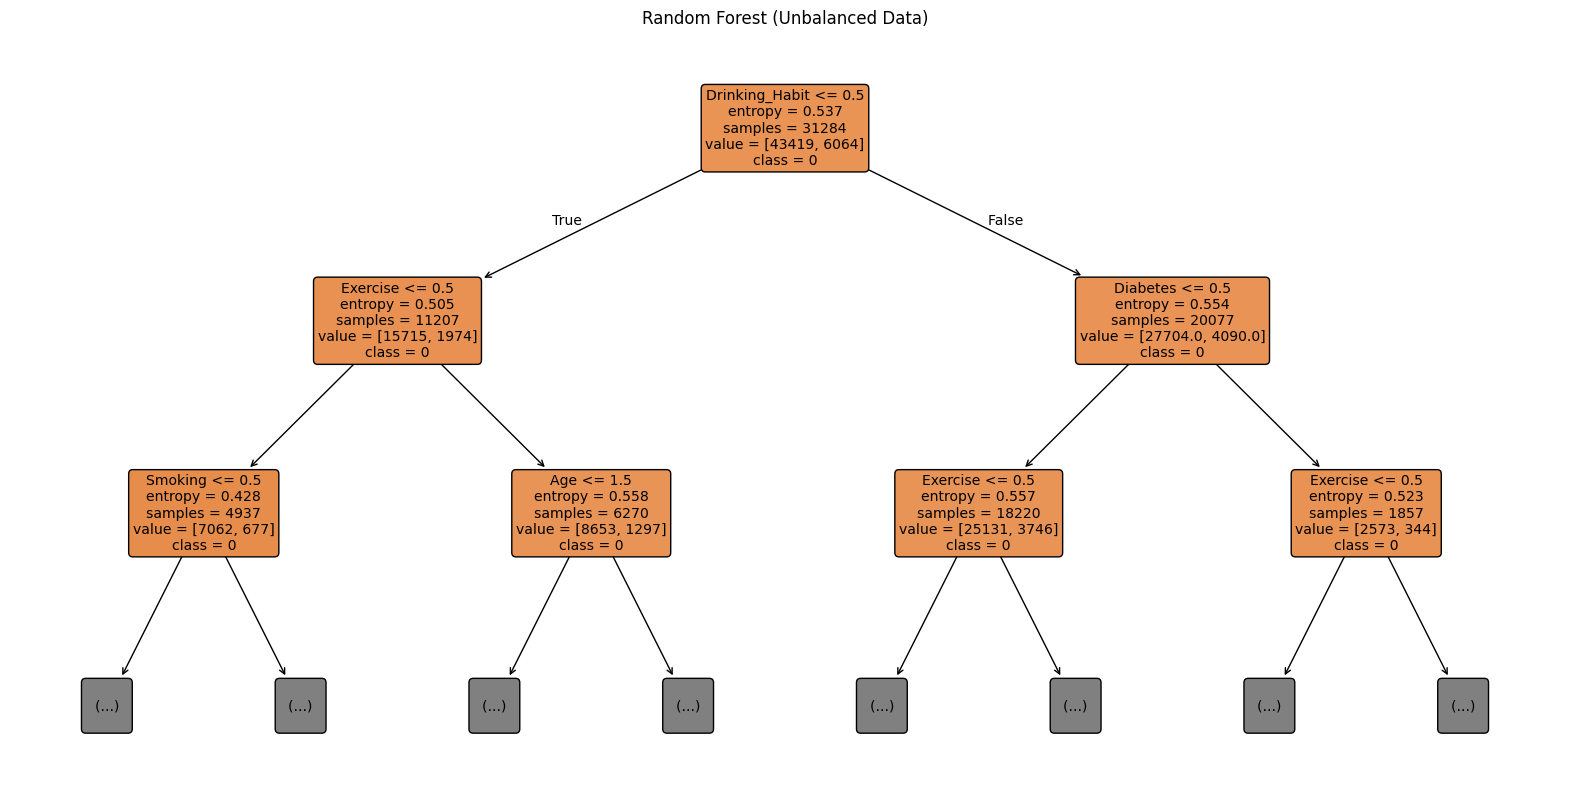

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(unbalanced_forest.estimators_[0], 
          feature_names=X.columns, 
          class_names=[str(cls) for cls in unbalanced_forest.classes_],
          filled=True, 
          rounded=True,
          max_depth=2)
plt.title("Random Forest (Unbalanced Data)")
plt.show()

In [ ]:
unbalanced_FI = unbalanced_forest.feature_importances_ # how much does this feature account for the variance

feat_importances = pd.DataFrame(unbalanced_FI, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(12,8))

In [14]:
# Apply SMOTE to Balance Dataset
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

df_smote = pd.DataFrame(X_resampled, columns=features)
df_smote["Poor_Sleep"] = y_resampled

In [15]:
# Train after SMOTE
balanced_forest = RandomForestClassifier(criterion="entropy", max_depth=8, random_state=42)
balanced_forest.fit(X_resampled, y_resampled)

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=42)

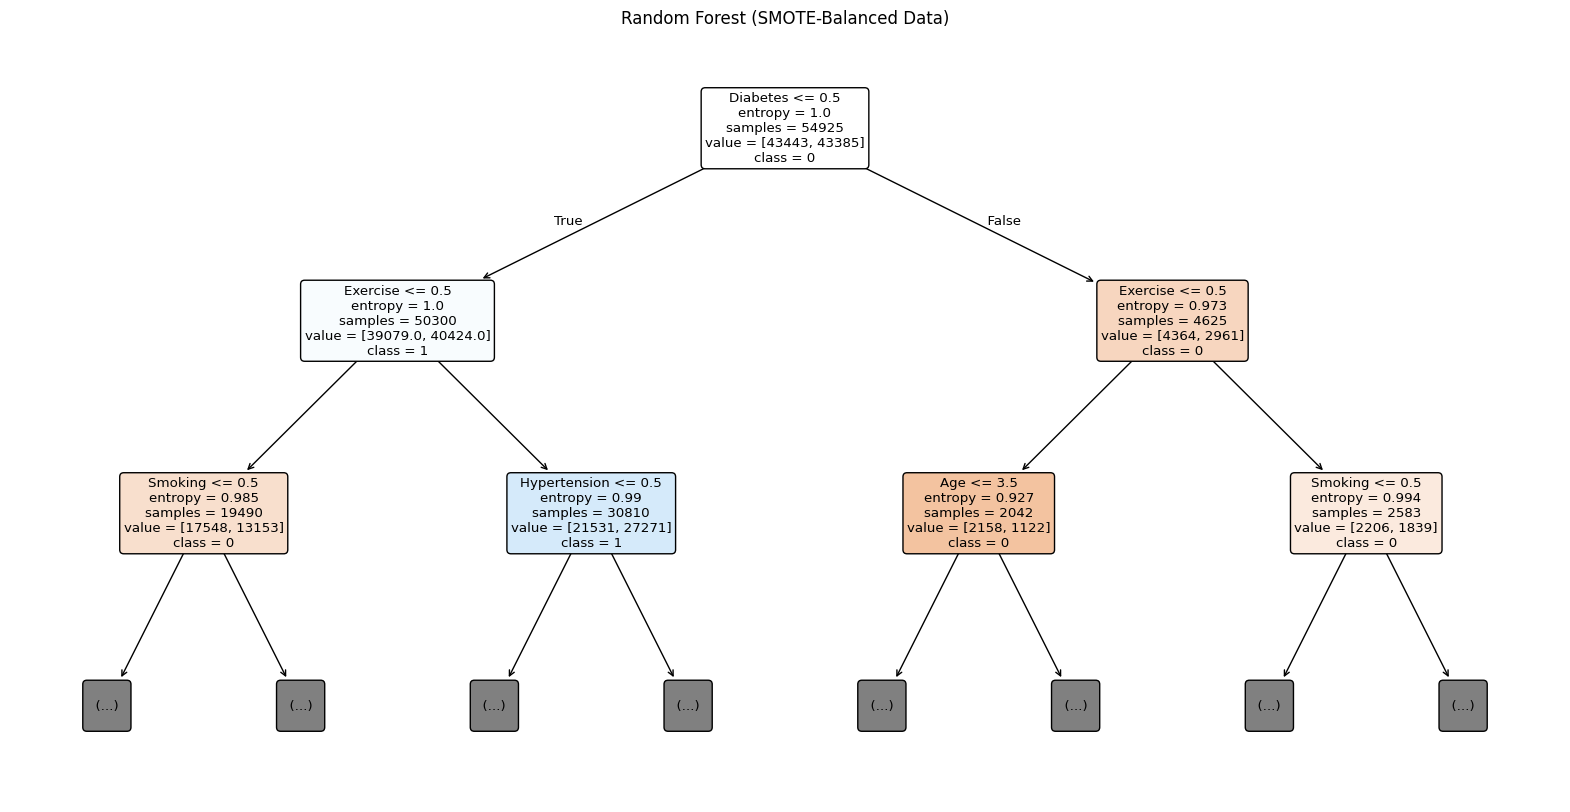

In [16]:
plt.figure(figsize=(20, 10))
plot_tree(balanced_forest.estimators_[0], 
          feature_names=X.columns, 
          class_names=[str(cls) for cls in balanced_forest.classes_],
          filled=True, 
          rounded=True,
          max_depth=2)
plt.title("Random Forest (SMOTE-Balanced Data)")
plt.show()